In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("data-train.csv",index_col=0)
X_train.drop(['sales'],axis=1)
Y_train = X_train.sales

In [3]:
#X_train = pd.read_csv("B_encoded_train_data.csv",index_col=0)
#Y_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [4]:
Model_1 = DecisionTreeRegressor()

# 2. Setup Pipeline

In [5]:

RG = Model_1

In [6]:

pipe = Pipeline(steps=[("RG",RG)])

In [7]:
param_grid = {
    "RG__ccp_alpha":[0,0.001,0.005,0.1,0.5,2,8]
}

# 3. Setup GridSearch

In [8]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [9]:
search.fit(X_train,Y_train.values.ravel())

GridSearchCV(cv=10, estimator=Pipeline(steps=[('RG', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'RG__ccp_alpha': [0, 0.001, 0.005, 0.1, 0.5, 2, 8]},
             scoring='neg_mean_squared_error')

In [10]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-56.732):
{'RG__ccp_alpha': 0.1}


In [11]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,0.042881,0.019419,0.007811,0.010480,0.1,{'RG__ccp_alpha': 0.1},-1.679275,-2.393238,-2.633310,-31.273644,-488.907058,-2.924499,-10.057546,-2.207149,-21.550629,-3.690580,-56.731693,144.371539,1
1,0.045729,0.019257,0.009872,0.012210,0.001,{'RG__ccp_alpha': 0.001},-0.489322,-0.184334,-1.493417,-30.218209,-487.394162,-2.181160,-491.157631,-0.332436,-4.527211,-3.082443,-102.106032,193.773831,2
5,0.042525,0.011128,0.004954,0.003923,2,{'RG__ccp_alpha': 2},-10.577790,-11.133854,-12.132176,-59.869981,-605.173285,-8.022473,-496.996087,-11.316187,-22.302790,-10.256610,-124.778123,215.013139,3
0,0.043282,0.019649,0.009009,0.009875,0,{'RG__ccp_alpha': 0},-0.241379,-0.702586,-1.383621,-89.693966,-702.354978,-0.138528,-487.008658,-0.238095,-4.510823,-2.480519,-128.875315,239.262519,4
6,0.057735,0.019080,0.012674,0.008868,8,{'RG__ccp_alpha': 8},-49.099797,-37.659949,-35.202079,-85.657906,-538.674923,-25.569951,-516.803477,-44.381088,-61.485658,-41.850392,-143.638522,192.742633,5
2,0.048814,0.020384,0.012116,0.011067,0.005,{'RG__ccp_alpha': 0.005},-0.215177,-0.383922,-1.900991,-893.558529,-295.862478,-0.598534,-491.933549,-0.820674,-20.280567,-3.044542,-170.859896,289.218678,6
4,0.048886,0.018002,0.003964,0.004780,0.5,{'RG__ccp_alpha': 0.5},-2.477027,-3.156375,-4.599813,-897.267491,-302.082722,-4.764464,-491.908388,-4.085787,-14.132428,-5.558790,-173.003328,289.710639,7


# 4. Best Hyperparameter

In [12]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__ccp_alpha': 0.1}


# 5. Evaluate Model $log(Sales)$

In [13]:
best_ccp_alpha = parms.iloc[0][0]['RG__ccp_alpha']

In [14]:
Model_2 = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [16]:

RG1 = Model_2
RG1.fit(X_train1,Y_train1.values.ravel())

DecisionTreeRegressor(ccp_alpha=0.1)

In [17]:
MSE(RG1.predict(X_test1),Y_test1)

2.2053198782654264

In [18]:
result = pd.DataFrame(Y_test1)

In [19]:
result["Predicted_sales"] = RG1.predict(X_test1)

In [20]:
MSE(result["sales"],result["Predicted_sales"])

2.2053198782654264

# 6. Inventory Decision

In [21]:
residual = result['sales']-result['Predicted_sales']

In [22]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [23]:
import scipy.stats as sct

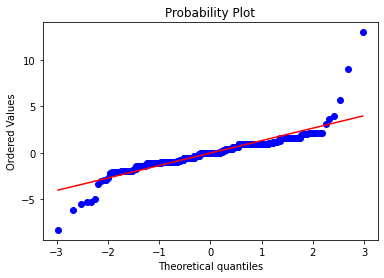

In [24]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [25]:
s = residual.std()
opt_dec_N=round(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

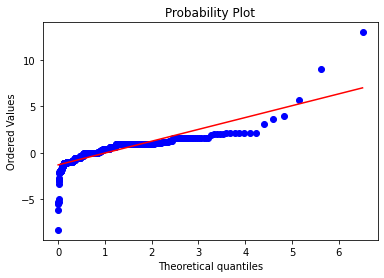

In [26]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [27]:
opt_dec_E=round((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

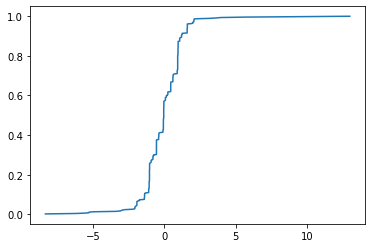

In [28]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

In [29]:
plt.hist(Sample)
plt.show()

In [ ]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [ ]:
offset = inv(Sample,jumps,2/3)
offset

In [ ]:
opt_dec_B = round(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [ ]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

In [ ]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [ ]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

In [ ]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

In [ ]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [ ]:
Model_4= DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)

In [ ]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    
    #Model
    RG_K = Model_4
    RG_K.fit(X_train_K,Y_train_K.ravel())
    
    #pca to transform test data
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(X_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(Y_test_K)
    result_K["Predicted_sales"] = RG_K.predict(X_test_K)
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [ ]:
fraction_table

In [ ]:
profit_table

In [ ]:
profit_table.to_csv(".\\Model_Selection_Result\\4.2B_Decision_tree(No_PCA).csv")

In [ ]:
plt.xlabel("sales")
plt.ylabel("Residual")
plt.plot(result['sales'],residual,".")